<a href="https://colab.research.google.com/github/AJoanaLlave/COM_300-Llave-Salas-Angeles-Joana/blob/main/Laboratorio5_Pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO N°5 - SIS420 APRENDIZAJE SEMISUPERVISADO**

                                         
                                         INTEGRANTES DE GRUPO
 **NOMBRE**                                                     
*   Avendaño Cruz Adan  (ing. en diseño y animación digital)
*   Barja Coragua Erlinda
*   Llaves Salas Angeles Joana  (ing. en diseño y animación digital)
*   Mamani Ramos Lizandro
*   Pereira Cuba Claudia


#PUNTO 1

Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 10, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.

Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo.

Genera un dataset aleatorio con n_clusters centroides bien separados.
El número de clusters está entre 1 y 10, permitiendo la visualización de los grupos, de la manera más clara posible.

n_samples: Número de puntos datos

n_clusters: Número de cluster o centroides

random_state: Semilla para garantizar la reproducibilidad

cluster_std: Desviación estándar de los clusters (controla la dispersión de los puntos)

Como primer paso nos vamos a concentrar en generar datos aleatorios, con una muestra de como funciona en gráfica al final de este primer paso.
Este tendrá como objetivo generar de un cluster como mínimo y 10 clusters como máximo

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Función para generar datos aleatorios con centroides alejados entre sí
def generate_data_with_distant_centroids():

    #Genera un dataset aleatorio con entre 1 y 10 clusters y con centroides
    #significativamente distanciados entre sí.

    # Parámetros aleatorios
    n_clusters = np.random.randint(1, 11)  # Número de clusters aleatorio entre 1 y 10
    n_samples = np.random.randint(200, 1001)  # Número aleatorio de muestras entre 200 y 1000
    cluster_std = np.random.uniform(0.4, 1.5)  # Desviación estándar de los clusters

    # Generar centros alejados en un rango amplio (por ejemplo, entre -50 y 50 en cada coordenada)
    centers = np.random.uniform(-50, 50, size=(n_clusters, 2))

    # Generar el dataset con los centros distanciados
    X, y_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=np.random.randint(0, 100))

    # Visualización de los datos generados
    plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
    plt.title(f'Dataset generado con {n_clusters} centroides considerablemente distanciados')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return X, n_clusters

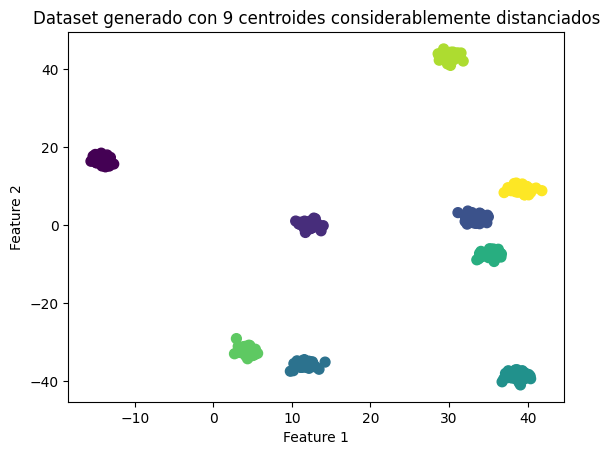

In [24]:
X, n_clusters = generate_data_with_distant_centroids()

Si bien ya teniamos los centroides distanciados, en el siguiente código vamos a aplicar k-means, y también poder mostrar los centroides justo encima de los clusters.

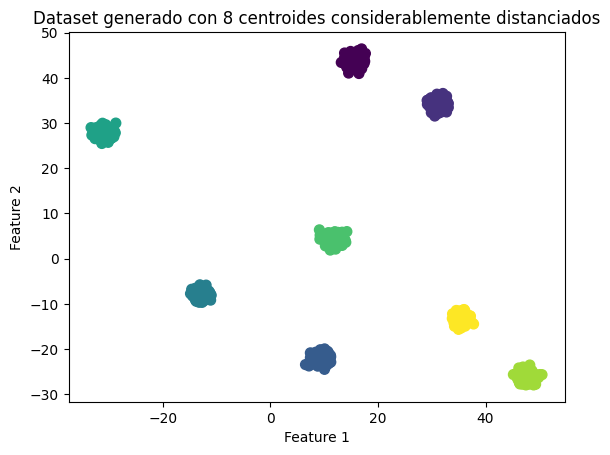

<ipython-input-25-c8f86285e9cd>:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', edgecolor='black', linewidths=2)


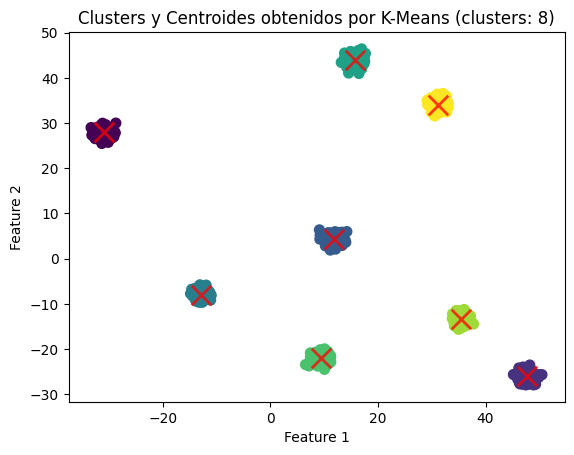

In [25]:
# Paso 1: Generar el dataset con centroides distanciados
X, n_clusters = generate_data_with_distant_centroids()

# Paso 2: Aplicar K-Means con el número de clusters aleatorio generado
kmeans = KMeans(n_clusters=n_clusters, random_state=np.random.randint(0, 100))
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Paso 3: Visualización de los clusters encontrados por K-Means con centroides encima
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Mostrar los centroides encontrados encima de los clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x', edgecolor='black', linewidths=2)
plt.title(f'Clusters y Centroides obtenidos por K-Means (clusters: {n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [26]:
# Nos permite ver la posición de los centroides
kmeans.cluster_centers_

array([[-30.82157018,  27.91120235],
       [ 47.6525568 , -25.91786524],
       [ 11.84392414,   4.42203958],
       [-12.8277839 ,  -7.93806579],
       [ 15.68851786,  43.84396743],
       [  9.44227159, -22.04539228],
       [ 35.52983326, -13.34057617],
       [ 31.21849455,  34.06307528]])

In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

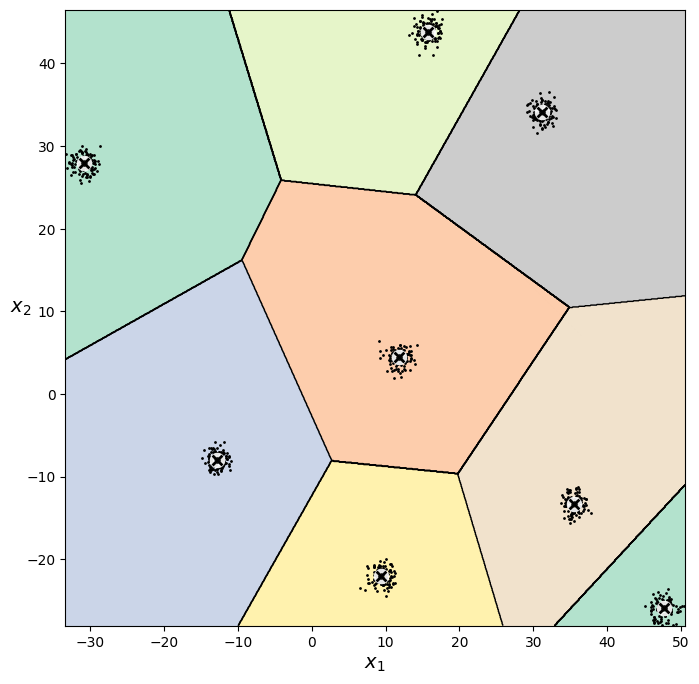

In [28]:
plt.figure(figsize=(8, 8))
plot_decision_boundaries(kmeans, X)
plt.show()

#PUNTO 2

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans

# Ruta donde se almacenan las imágenes PNG
ruta_principal = '/content/drive/MyDrive/COM_300/LAB 5/mammals'

# Crear una lista para almacenar los arrays de imágenes y los nombres de archivo
imagenes_data = []
nombres_archivos = []
etiquetas = []  # Para almacenar las etiquetas (nombres de las carpetas)

# Iterar sobre las imágenes en el directorio y subdirectorios
for root, dirs, files in os.walk(ruta_principal):
    for archivo in files:
        if archivo.endswith('.jpg'):
            # Construir la ruta completa del archivo
            ruta_archivo = os.path.join(root, archivo)
            try:
                # Abrir la imagen
                img = Image.open(ruta_archivo)
                # Convertir la imagen a escala de grises
                img = img.convert('L')
                # Convertir la imagen a un array de numpy y aplanar
                img_array = np.array(img).flatten()
                # Añadir el array al dataset y el nombre del archivo
                imagenes_data.append(img_array)
                nombres_archivos.append(archivo)
                # Añadir la etiqueta (nombre de la carpeta)
                etiqueta = os.path.basename(root)  # Obtiene el nombre de la carpeta
                etiquetas.append(etiqueta)
            except Exception as e:
                print(f'Error al abrir {ruta_archivo}: {e}')
                continue

# Convertir la lista de imágenes a un array de numpy
data = np.array(imagenes_data)

# Aplicar KMeans para clustering
n_clusters = len(set(etiquetas))  # Cambiar según el número de categorías únicas
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)

# Obtener etiquetas asignadas
etiquetas_kmeans = kmeans.labels_

# Crear un DataFrame con los datos, etiquetas y nombres de archivo
df = pd.DataFrame(data)  # Crear DataFrame a partir de los datos de imágenes
df['Etiqueta'] = etiquetas_kmeans  # Añadir la columna de etiquetas

# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset_imagenes_con_etiquetas.csv', index=False)

print('Etiquetas guardadas en dataset_imagenes_con_etiquetas.csv')

# Separar en X (características) e y (etiquetas)
X_final = df.drop(['Etiqueta'], axis=1)  # Características (imágenes)
y_final = df['Etiqueta']  # Etiquetas

# Mostrar las dimensiones de X e y
print(f'Dimensiones de X: {X_final.shape}, Dimensiones de y: {y_final.shape}')




InvalidParameterError: The 'n_clusters' parameter of KMeans must be an int in the range [1, inf). Got 0 instead.

Etiquetas guardadas en dataset_imagenes_con_etiquetas.csv
Dimensiones de X: (1968, 65536), Dimensiones de y: (1968,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset (si ya lo tienes guardado en CSV)
data = pd.read_csv('dataset_imagenes_con_etiquetas.csv')

# Normalizar los datos (esto es importante para algoritmos como k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Definir el rango de k (número de clusters) que vamos a probar
rango_k = range(2, 7)

# Lista para almacenar los silhouette scores
silhouette_scores = []

# Aplicar k-means y calcular el Silhouette Score para cada valor de k
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    etiquetas = kmeans.fit_predict(data_scaled)

    # Calcular el silhouette score
    score = silhouette_score(data_scaled, etiquetas)
    silhouette_scores.append(score)
    print(f'Para k={k}, Silhouette Score: {score}')

# Crear una gráfica de Silhouette Score vs número de clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(list(rango_k), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Encontrar el k con el Silhouette Score más alto
k_optimo = rango_k[np.argmax(silhouette_scores)]
print(f'El número óptimo de clusters es {k_optimo} con un Silhouette Score de {max(silhouette_scores)}')


In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
# distancias de cada punto a los centroides
X_digits_dist = kmeans.fit_transform(X_train)


In [ ]:
# datos mas cercanos al centroide
idxs = np.argmin(X_digits_dist, axis=0)
# Indices de los datos mas cercanos al centroide
X_representative_digits = X_train.values[idxs]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_data_2d_with_clusters(X, n_clusters=2):
    # Reducción de dimensionalidad a 2D
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Ajustar el modelo de clustering (KMeans)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Obtener las etiquetas de cluster asignadas a cada punto
    cluster_labels = kmeans.labels_

    # Dibujar los puntos de datos con colores según el cluster al que pertenecen
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')

    # Dibujar los centroides
    centroids_2d = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', c='red', s=100, label='Centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data with Clusters in 2D')
    plt.legend()

# Suponiendo que X_train_n es tu conjunto de datos de entrenamiento
plot_data_2d_with_clusters(X_train)
plt.show()

In [ ]:
# etiquetas de las imágenes representativas
y_representative_digits = y_train.values[idxs]

In [ ]:
from sklearn.linear_model import LogisticRegression

# multi_class="ovr": Este parámetro indica que se utilizará el enfoque de "uno contra el resto"
# solver="lbfgs": Este parámetro especifica el algoritmo que se utilizará para optimizar la
# función de costo. "lbfgs" es un método de optimización que se utiliza comúnmente en regresión logística
# y es eficiente para problemas de gran tamaño.
# max_iter=5000: Este parámetro establece el número máximo de iteraciones que el optimizador realizará
# para encontrar la solución
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Este método entrena el modelo de regresión logística usando los datos de entrenamiento.
%time log_reg.fit(X_representative_digits, y_representative_digits)

# Este método evalúa el rendimiento del modelo entrenado usando el conjunto de prueba
log_reg.score(X_test, y_test)

In [ ]:
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_train[:50], y_train[:50])
log_reg2.score(X_test, y_test)

In [ ]:
y_train_propagated = np.empty(len(X_train))

# kmeans.labels contiene todas las etiquetas de X_train
# devolviendo un true o false depende de la etiqueta y de la variable i
# y_train_propagated servira para obtener a todas las etiquetas 0 en la primera iteracion y seguira subiendo
# Entonces se asigna a los resultados verdaderos el numero de cluster representativo
for i in range(k): # 0 k-1
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:

log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

In [ ]:
# Se utiliza para predecir las probabilidades de cada clase para las primeras 1000 muestras en X_train
probas = log_reg3.predict_proba(X_train[:1000])
# Devuelve el índice de la clase con la probabilidad más alta para cada muestra
labels_ixs = np.argmax(probas, axis=1)
# Aquí se crea un nuevo array labels que contiene las probabilidades más altas para cada muestra,
# utilizando los índices de labels_ixs
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
# DFinalmente, se seleccionan las 10 muestras con las probabilidades más bajas (es decir, las más inciertas)
# al indexar labels con los primeros 10 índices de sorted_ixsevuelve los índices que ordenarían el
# array labels en orden ascendente.
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

In [ ]:
X_lowest = X_train.values[500:1000]
k = min(k, len(X_lowest))  # Asegúrate de que k no exceda la cantidad de elementos
sorted_ixs = [ix for ix in sorted_ixs if ix < len(X_lowest)]  # Filtrar índices fuera de rango
X_lowest = X_lowest[sorted_ixs[:k]] # Asegúrate de que k no exceda la cantidad de imágenes a mostrar

# Crea la figura para las imágenes
plt.figure(figsize=(15, 8))  # Aumenta el tamaño de la figura

# Determina el número de filas y columnas
n_cols = 2  # Cambia a 5 columnas para mostrar mejor
n_rows = (k // n_cols) + (k % n_cols > 0)  # Calcula el número de filas

# Itera sobre las imágenes seleccionadas
for index, img in enumerate(X_lowest[:k]):  # Asegúrate de limitar a k imágenes
    plt.subplot(n_rows, n_cols, index + 1)  # Usa n_rows y n_cols
    plt.imshow(img.reshape(256, 256), cmap="binary", interpolation="bilinear", aspect='auto')  # Cambia a 64x64
    plt.axis('off')  # Elimina los ejes

# Ajustar el espaciado entre subgráficas
plt.tight_layout()  # Esto ayuda a evitar superposiciones
plt.show()

In [ ]:
# Obtiene las primeras 1000 etiquetas del conjunto de entrenamiento
# Es un array que contiene los índices de las probabilidades clasificadas
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
# seleccionas las etiquetas que corresponden a esas imágenes de baja probabilidad
y_lowest

In [ ]:
# es un array que contiene las etiquetas propagadas para las imágenes de entrenamiento (etiquetas asignadas
# automaticamente)
y_train2 = y_train_propagated[:1000].copy()
# sorted son los índices de las imágenes con las probabilidades más bajas de clasificación
# estás reemplazando las etiquetas de las imágenes de baja probabilidad (que están en y_train2 en esos índices)
# con las nuevas etiquetas que has obtenido y almacenado en y_lowest
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=4000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)